  # Проект: Интернет-магазин «Стримчик»

Анализ исторических данных по продажам игр на различных платформах.
Необходимо выявить определяющие успешность игры закономерности.
Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламную кампанию.

### План исследования:

#### 1. Предобработка данных
- Посмотрим общую информацию о данных
- Сделаем предварительные выводы
- Заменим названия столбцов (приведем к нижнему регистру)
- Определим и заполним пропущенные значения
- Поищем аномалии
- Изменим типы данных
- Удалим дубликаты и отфильтруем ненужные столбцы

#### 2 .Посчитаем и добавим в таблицу:
- Суммарные продажи во всех регионах и запишите их в отдельный столбец.

#### 3. Проанализируем данные:
- Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?  
- Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
- Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
- Не учитывайте в работе данные за предыдущие годы.
- Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
- Постройте график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. Велика ли разница в продажах? А в средних продажах на разных платформах? Опишите результат.
- Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
- Соотнесите выводы с продажами игр на других платформах.
- Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

#### 4. Составим портрет пользователя каждого региона:
Определите для пользователя каждого региона (NA, EU, JP):

- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?


#### 5. Проверим гипотезы:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные.

#### 6. Общий вывод

#### Импортируем все необходимые для работы с данными библиотеки:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns

### Шаг 1. С помощью библиотеки Pandas откроем и изучим датасет:

In [ ]:
data = pd.read_csv('/datasets/games.csv')

In [ ]:
data.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Смотрим первые двадцать строк датасета, видим много пропусков.

### Шаг 2. Подготовим данные.

In [ ]:
data.shape

(16715, 11)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


#### Описание данных:
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
Данные за 2016 год могут быть неполными.

In [ ]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [ ]:
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [ ]:
data.duplicated().sum()

0

In [ ]:
data['Name'].nunique()

11559

In [ ]:
data['Name'].value_counts(dropna=False)

Need for Speed: Most Wanted                                   12
Madden NFL 07                                                  9
LEGO Marvel Super Heroes                                       9
Ratatouille                                                    9
FIFA 14                                                        9
                                                              ..
Mega Man X5                                                    1
WCW/nWo Revenge                                                1
Bravo Air Race                                                 1
Men of War: Vietnam                                            1
Nihon Pro Mahjong Kishikai Kanshuu: Pro Ni Naru Mahjong DS     1
Name: Name, Length: 11560, dtype: int64

In [ ]:
for col in data.columns:  
    pct_missing = np.mean(data[col].isna())  
    print('{} - {}%'.format(col, round(pct_missing*100,1))) 

Name - 0.0%
Platform - 0.0%
Year_of_Release - 1.6%
Genre - 0.0%
NA_sales - 0.0%
EU_sales - 0.0%
JP_sales - 0.0%
Other_sales - 0.0%
Critic_Score - 51.3%
User_Score - 40.1%
Rating - 40.5%


Выводы:

- critic_score - оценка критиков - вполне возможно, что игры не оценивались критиками, т.к. более старые игры не проходили такую модерацию. Было бы неправильно заполнить рейтинг игры средним или медианой, даже если бы мы их считали внутри для каждого жанра отдельно. Тем не менее, чтобы иметь возможность быстрой фильтрации данных и возможность их беспрепятственно обрабатывать, поставим этим играм рейтинг -1 (вдруг у какой-то игры есть нулевой рейтинг, поставив -1, мы никогда не перемешаем игры с NaN и с реально нулевым рейтингом);
- rating - рейтинг от ESRB - может быть, в те времена не было такой организации, вот и рейтинга от неё тоже нет. Здесь то же самое. Невозможно дать рейтинг игре, посчитав его как среднее рейтингов игр того же жанра. Поставим рейтинг "NaN";
- user_score - те же причины, вероятно, ранее не было сервисов, которые собирали бы рейтинги игроков. Поэтому и присутствуют пропуски. Поступим так же, как и со столбцом critic_score.
- Столбец year_of_release (год выпуска игры) имеет 1,6% пропусков. Не много, но неприятно. Средними/медианами эти пропуски не заполнить, эти данные не являются самыми важными для анализа данных, да и пропусков в столбце не так много. Другими словами, целых данных достаточно для анализа, поэтому удалим отсутствующие данные.

- Ни по одному столбцу заполнить пропуски хотя бы усредненными данными не представляется возможным. Тем не менее, заполним их "нереальными" данными для возможности спокойно работать с этими строками по другим параметрам

- Необходима коррекция названии столбцов,
- Необходимо удалить пропущенные значения в столбце year_of_release их количество небольшое на результат влияние не окажет
- В стобце 'user_score' значение 'tbd' заменено на None Абривеатура 'tbd' то есть To Be Determined, что значит "будет определенно", сам столбец преобразуем в формат float

#### Приведём названия столбцов к нижнему регистру:

In [ ]:
data.columns = [x.lower() for x in data.columns]

In [ ]:
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


#### Преобразуем типы данных в столбцах:

In [ ]:
data['critic_score'].convert_dtypes()

0          76
1        <NA>
2          82
3          80
4        <NA>
         ... 
16710    <NA>
16711    <NA>
16712    <NA>
16713    <NA>
16714    <NA>
Name: critic_score, Length: 16715, dtype: Int64

Округлили столбец с оценкой критиков.

In [ ]:
data['user_score'].describe()

count     10014
unique       96
top         tbd
freq       2424
Name: user_score, dtype: object

Посмотрели значения в столбце user_score и посмотрели уникальные значения.

In [ ]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [ ]:
data[data['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


Посмотрели сколько в столбце user_score значений tbd. Судя по справочной информации TBD - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято. Акроним служит для отметки неясностей или пропусков, которые надо заполнить, в информации требований. Поэтому просто заменим эти значения в столбце на NaN, и для удобство использования данных приведем их к типу float:

In [ ]:
data['user_score'] = data['user_score'].replace('tbd', np.NaN)
data['user_score'] = data['user_score'].astype('float')

#### Обработаем пропуски.

In [ ]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

Для начала смотрим сколько всего у нас в датасете пропущенных значений.

In [ ]:
data.isnull().sum().sort_values(ascending = False)

user_score         9125
critic_score       8578
rating             6766
year_of_release     269
name                  2
genre                 2
platform              0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
dtype: int64

In [ ]:
data.query('name.isnull()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


По данным играм нет информации, подобные пропуски будет тяжело заполнить. Но, так как их доля не велика, их можно удалить, без вреда для результатов анализа.

In [ ]:
data = data.dropna(subset=['name'])

In [ ]:
data.query('year_of_release.isnull()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,NaN,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [ ]:
for col in data.columns:
    pct_missing = np.mean(data[col].isna())
    print('{} - {}%'.format(col, round(pct_missing*100,2)))

name - 0.0%
platform - 0.0%
year_of_release - 1.61%
genre - 0.0%
na_sales - 0.0%
eu_sales - 0.0%
jp_sales - 0.0%
other_sales - 0.0%
critic_score - 51.31%
user_score - 54.59%
rating - 40.47%


In [ ]:
data = data[data['year_of_release'].isna()==False].copy()

Заполнить данные по годам будет тяжело, поэтому удалим 269 строк, как видим их доля не велика, а значит не будет искажать результаты анализа.

In [ ]:
data['year_of_release'] = data['year_of_release'].astype('int64')

Привели значения в столбце year_of_release к типу int для более корректного отображения года.

In [ ]:
data['critic_score'] = data['critic_score'].fillna(-1)
data['user_score'] = data['user_score'].fillna(-1)

In [ ]:
print('Количество пропусков в столбце critic_score - {}'.format(data['critic_score'].isnull().sum()))
print('Количество пропусков в столбце user_score - {}'.format(data['user_score'].isnull().sum()))

Количество пропусков в столбце critic_score - 0
Количество пропусков в столбце user_score - 0


В столбцах critic_score и user_score слишком много пропущенных значений, поэтому заполняем их индикаторным значением пропуска, чтобы это не влияло на смещение оценки

In [ ]:
data['rating'] = data['rating'].fillna('Unknown')

Так как данные в столбце с рейтингом восстановить у нас не получится, мы заполним их значением unknow

In [ ]:
data.isnull().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

Пропуски заполнены, выделим наши маркеры:

In [ ]:
year_of_release_mark = 'year_of_release != -1'
critic_score_mark = 'critic_score != -1'
user_score_mark = 'user_score != -1'
rating_mark = 'rating != "Unknown"'

In [ ]:
data['sales_total'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

Посчитали суммарные продажи во всех регионах.

### Шаг 3. Исследовательский анализ данных.

#### Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

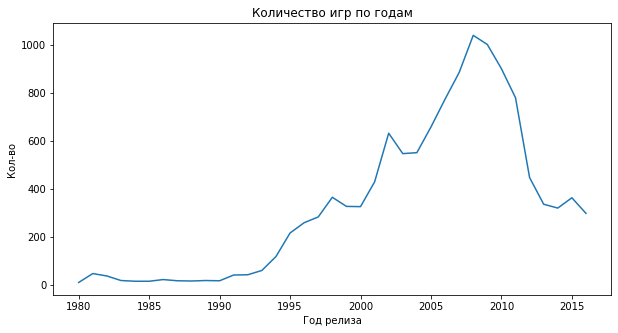

In [ ]:
game_release = data.query(year_of_release_mark)
game_release = (
    game_release[['name', 'year_of_release']]
        .drop_duplicates()
        .pivot_table(index='year_of_release', values='name', aggfunc='count')
        .sort_values('year_of_release', ascending=False)
)
(
    game_release
        .plot(figsize=(10, 5),legend=False,title='Количество игр по годам')
        .set(xlabel='Год релиза', ylabel='Кол-во')
)

plt.show()


##### Как видим из графика рост продаж начался в 1995 году. В это время начали появляться персональные компьютеры и игровые консоли.
С 2010 года наблюдается спад, это может быть связано с отсутствием данных по таким сегментам как MMORPG,MMOBA, Survival а также нет данных по мобильным играм
Рассматривать совсем старые игры нецелесообразно, возьмём последний период в 3-5 лет.

#### Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

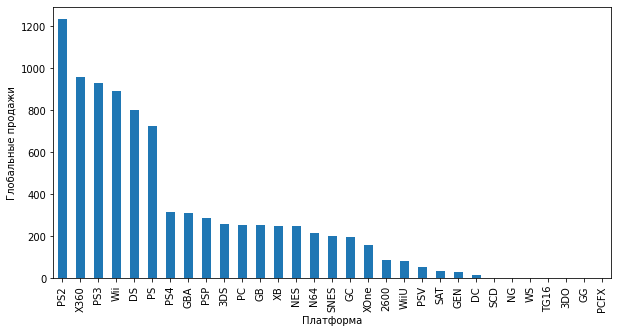

In [ ]:
sales_total_platform = (data.groupby(['platform'],as_index = False)['sales_total'].sum()
                                 .sort_values('sales_total',ascending = False)
                           )
(sales_total_platform.plot(kind='bar',x='platform', y='sales_total',figsize=(10, 5),legend=False)
                         .set(xlabel='Платформа', ylabel='Глобальные продажи')
)
plt.show()


Как видим из графика лидерами выступают шесть платформ, посмотрим на их распределение по годам.

In [ ]:
top_6 = sales_total_platform.head(6)['platform'].tolist()
top_6

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

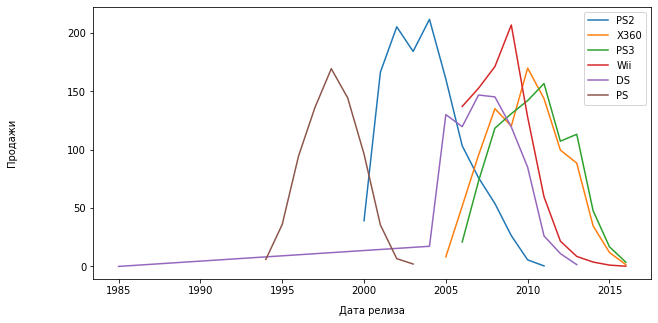

In [ ]:
for name in top_6:
    data.query('platform == @name and year_of_release != -1').pivot_table(index = 'year_of_release',
                        values = 'sales_total', aggfunc = 'sum').sort_values('year_of_release',
                                                    ascending = False)['sales_total'].plot(figsize = (10, 5), label=name)
   
    plt.xlabel('Дата релиза', labelpad = 10)
    plt.ylabel('Продажи', labelpad = 50)
    plt.legend()


Выводы:
    Из графика следует, что платформы появляются и исчезают в течение приблизительно 10 лет. Это связано с развитием технологий и устареванием железа в старых консолях, так как новые игры выходят с новыми требованиями

 - Для нашего прогноза целесообразно рассмотреть период за последние 5 лет, т.е. те платформы которые набирают популярность, либо находятся на пике и являются волатильными. 

- Нам необходимо выбрать актуальный период - период, за который мы будем оценивать наши данные, на основании выводов по которым будем строить предсказательные модели на 2017 год.

- На мой взгляд, лучшим периодом для анализа является период с 2012 по 2016 год:

Это период, когда вышли или вот-вот выйдут все популярные консоли, он так же является пиковым промежутком. 
в нём мы видим последние актуальные платформы, которые популярны сейчас.
в этом периоде представлены данные по абсолютно всем самым популярным консолям. И именно этот период мы сможем использовать для прогнозирования нашей бизнес модели, так как более ранние года будут не актуальны для нашего анализа.
Предыдущие года отбросим, так как там много платформ которые уже перестали существовать и просто не подойдут для нашего анализа.

#### Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

In [ ]:
actual_platforms = data.query('year_of_release >= 2012')
actual_platforms_sales = (actual_platforms.groupby(['platform'],as_index = False)['sales_total'].sum()
                                 .sort_values('sales_total',ascending = False)
                           )
actual_platforms_sales

,platform,sales_total
4,PS4,314.14
3,PS3,288.79
9,X360,236.54
0,3DS,194.61
10,XOne,159.32
8,WiiU,82.19
2,PC,62.65
6,PSV,49.18
7,Wii,35.37
1,DS,12.55


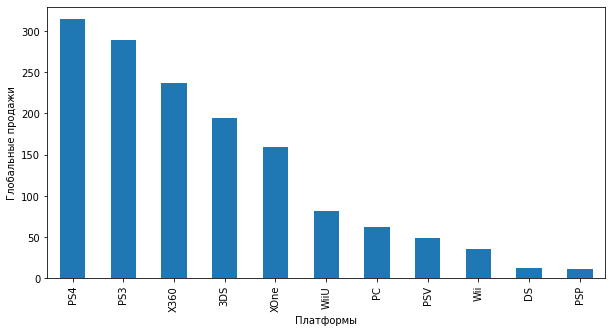

In [ ]:
(actual_platforms_sales.plot(kind='bar',x='platform', y='sales_total',figsize=(10, 5),legend=False)
                         .set(xlabel='Платформы', ylabel='Глобальные продажи')
)
plt.show()

In [ ]:
top_actual = actual_platforms_sales['platform'].tolist()
top_actual

['PS4', 'PS3', 'X360', '3DS', 'XOne', 'WiiU', 'PC', 'PSV', 'Wii', 'DS', 'PSP']

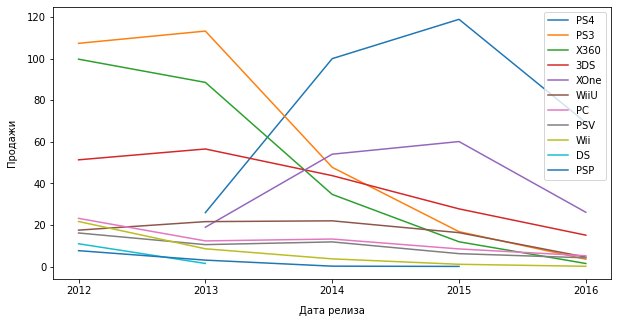

In [ ]:
for name in top_actual:
    actual_platforms.query('platform == @name').pivot_table(index = 'year_of_release',
                        values = 'sales_total', aggfunc = 'sum').sort_values('year_of_release',
                                                    ascending = False)['sales_total'].plot(figsize=(10, 5), label = name)
    
    plt.xticks(np.arange(2012, 2017, step=1))
    plt.xlabel('Дата релиза', labelpad = 10)
    plt.ylabel('Продажи', labelpad = 10)
    plt.legend()

In [ ]:
sales_year_platform = (pd.pivot_table(actual_platforms , index='platform',
                                       columns='year_of_release', values='sales_total', aggfunc='sum').reset_index())
display(sales_year_platform)

year_of_release,platform,2012,2013,2014,2015,2016
0,3DS,51.36,56.57,43.76,27.78,15.14
1,DS,11.01,1.54,NaN,NaN,NaN
2,PC,23.22,12.38,13.28,8.52,5.25
3,PS3,107.36,113.25,47.76,16.82,3.60
4,PS4,NaN,25.99,100.00,118.90,69.25
5,PSP,7.69,3.14,0.24,0.12,NaN
6,PSV,16.19,10.59,11.90,6.25,4.25
7,Wii,21.71,8.59,3.75,1.14,0.18
8,WiiU,17.56,21.65,22.03,16.35,4.60
9,X360,99.74,88.58,34.74,11.96,1.52


Продажи падают на всех платформах, думаю это связано с растущей популярностью мобильных игр.

Выводы: 

- Среди исследуемых нами платформ лидирующими по продажам в нашем временном промежутке были выявлены:
PS4, PS3, X360, 3DS, XOne.

- На конец 2016 года лидируют по продажам следующие платформы:
PS4;
Xone;
3DS.
Это топ-3. Потенциально прибыльных платформ.
- Исходя из данных, количество продаж игр, выпущенных на каждую из этих платформ, снижается. Таким образом, можно сказать, что весь рынок игр падает.

#### Построим график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. Посмотрим велика ли разница в продажах? А в средних продажах на разных платформах? Опишем результат.

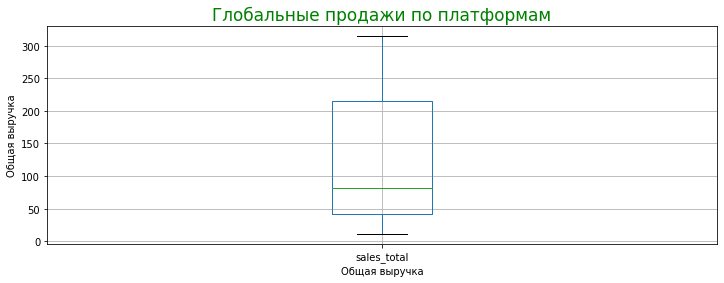

In [ ]:
actual_platforms_sales.boxplot('sales_total', figsize=(12,4))

plt.title('Глобальные продажи по платформам', fontsize=17, color='green')
plt.xlabel('Общая выручка')
plt.ylabel('Общая выручка')
plt.show()

Создадим функцию которая позволит нам построить Boxplot по глобальным продажам игр и с разбивкой по платформам:

In [ ]:
def create_any_sales_boxplot(title=None, query_condition = None, ylims=None):
    %matplotlib inline
    if query_condition == None:
        ax = data.boxplot(column='sales_total', fontsize=25, figsize=(25,10),
                                         boxprops=dict(linestyle='-', linewidth=5),
                                         medianprops=dict(linestyle='-', linewidth=5),
                                         whiskerprops=dict(linestyle='-', linewidth=5),
                                         capprops=dict(linestyle='-', linewidth=5), 
                                         notch=True)
    else:
        data_query = data.query(query_condition)
        by_column = query_condition.split()[0]
        ax = data_query.boxplot(column='sales_total', by=by_column, fontsize=25, figsize=(25,10),
                                         boxprops=dict(linestyle='-', linewidth=5),
                                         medianprops=dict(linestyle='-', linewidth=5),
                                         whiskerprops=dict(linestyle='-', linewidth=5),
                                         capprops=dict(linestyle='-', linewidth=5),
                                         notch=True)
        ax.set_xlabel('')
        ax.set_title('')
    if ylims != None:
        ax.set_ylim(ylims)
    if title != None:
        plt.suptitle(title, y=0.94, fontsize=25, fontweight='bold')

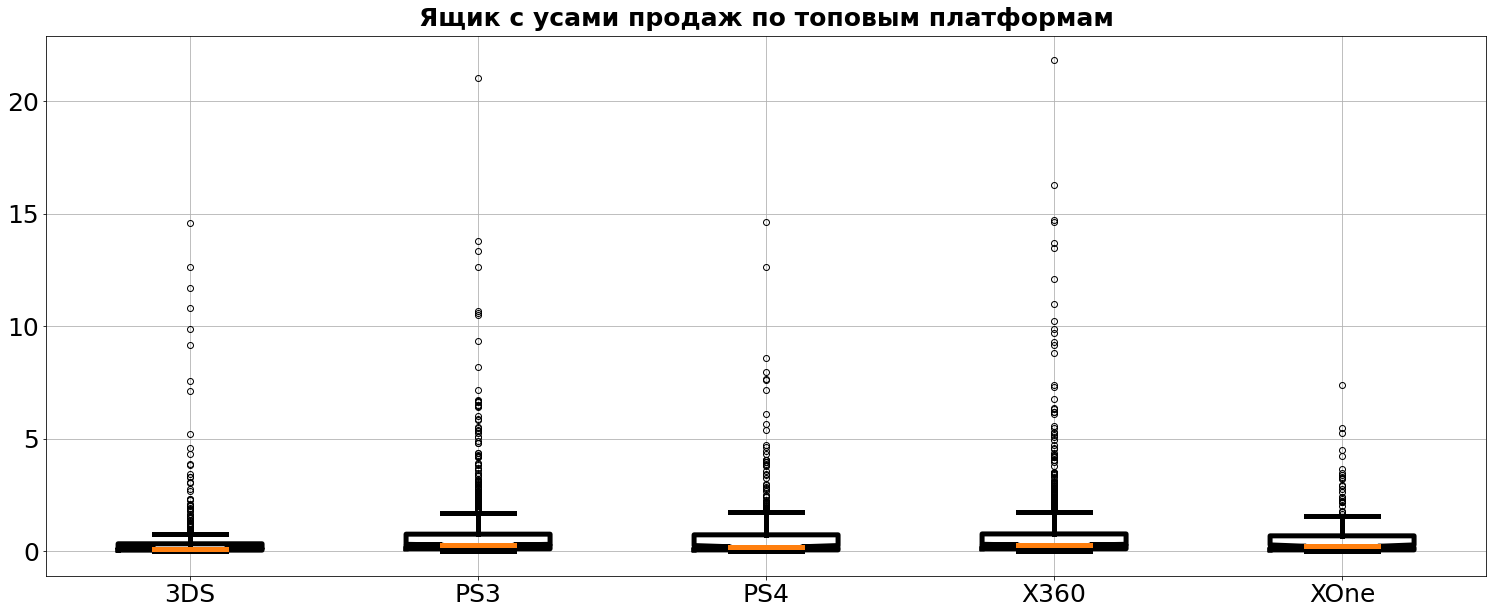

In [ ]:
top_platforms = ['PS4', 'PS3', 'X360', '3DS', 'XOne']
create_any_sales_boxplot('Ящик с усами продаж по топовым платформам', query_condition="platform in @top_platforms")

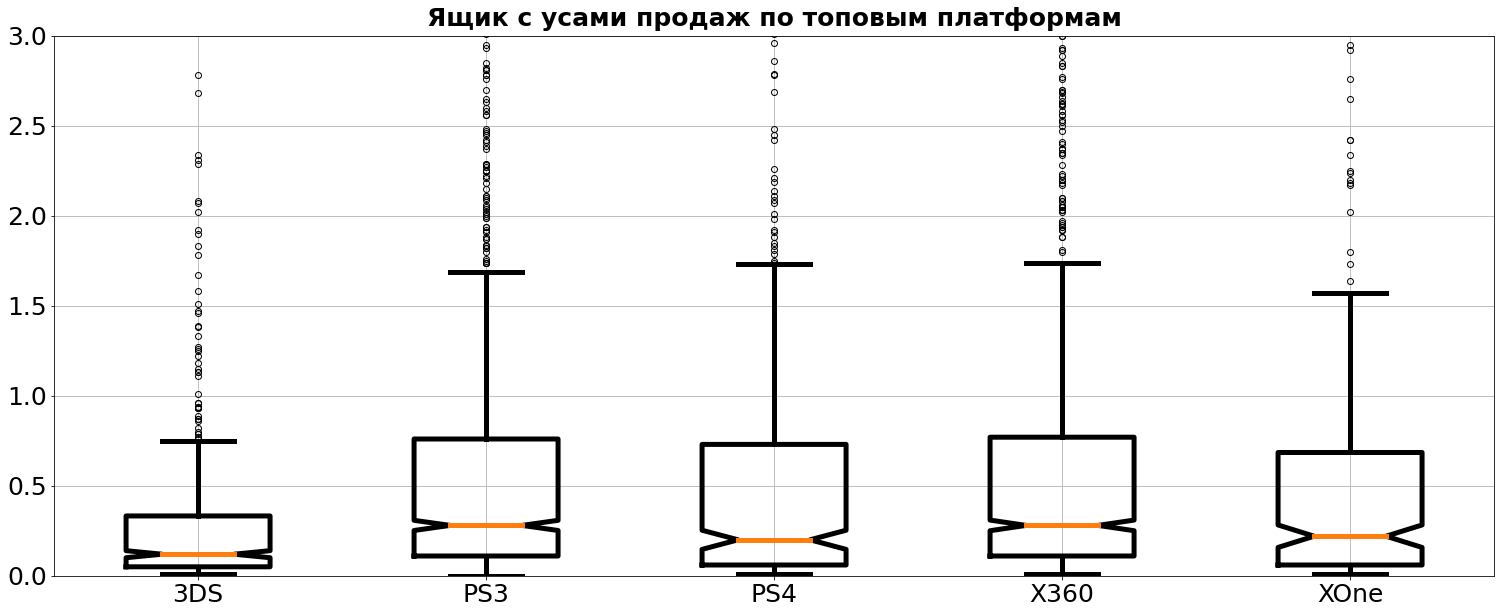

In [ ]:
create_any_sales_boxplot('Ящик с усами продаж по топовым платформам', query_condition="platform in @top_platforms", ylims=[0,3])

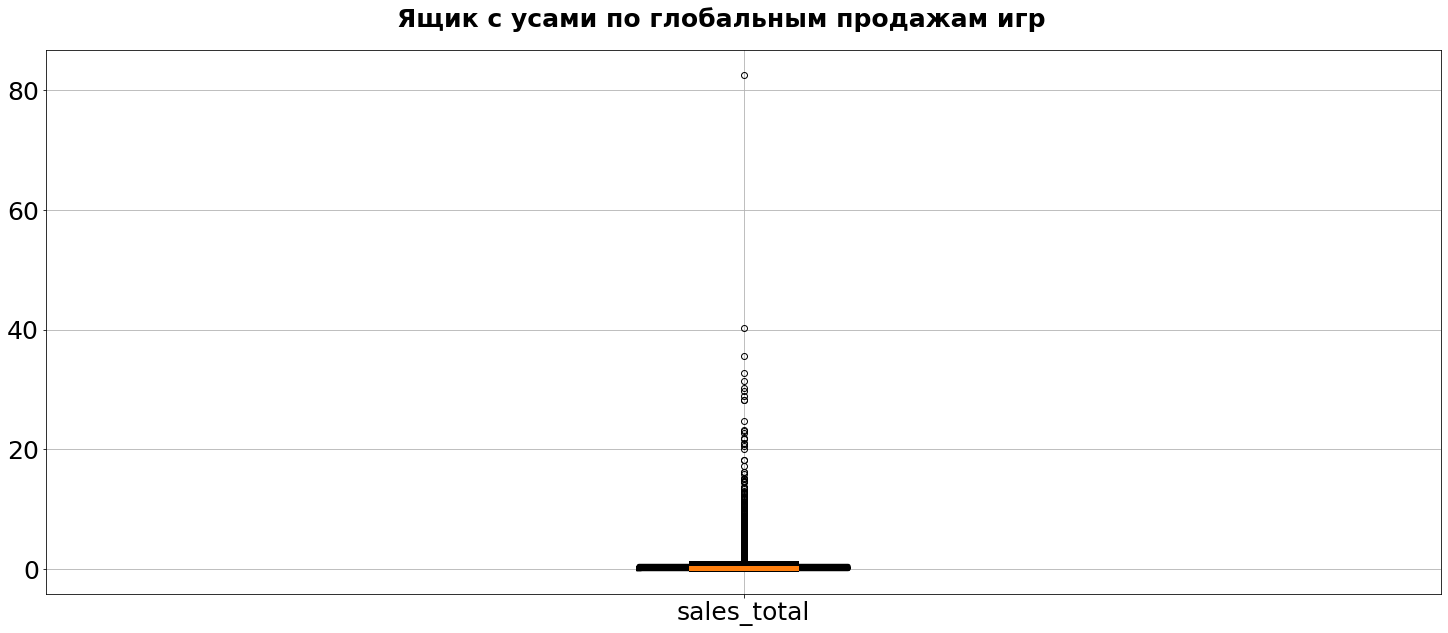

In [ ]:
create_any_sales_boxplot('Ящик с усами по глобальным продажам игр')

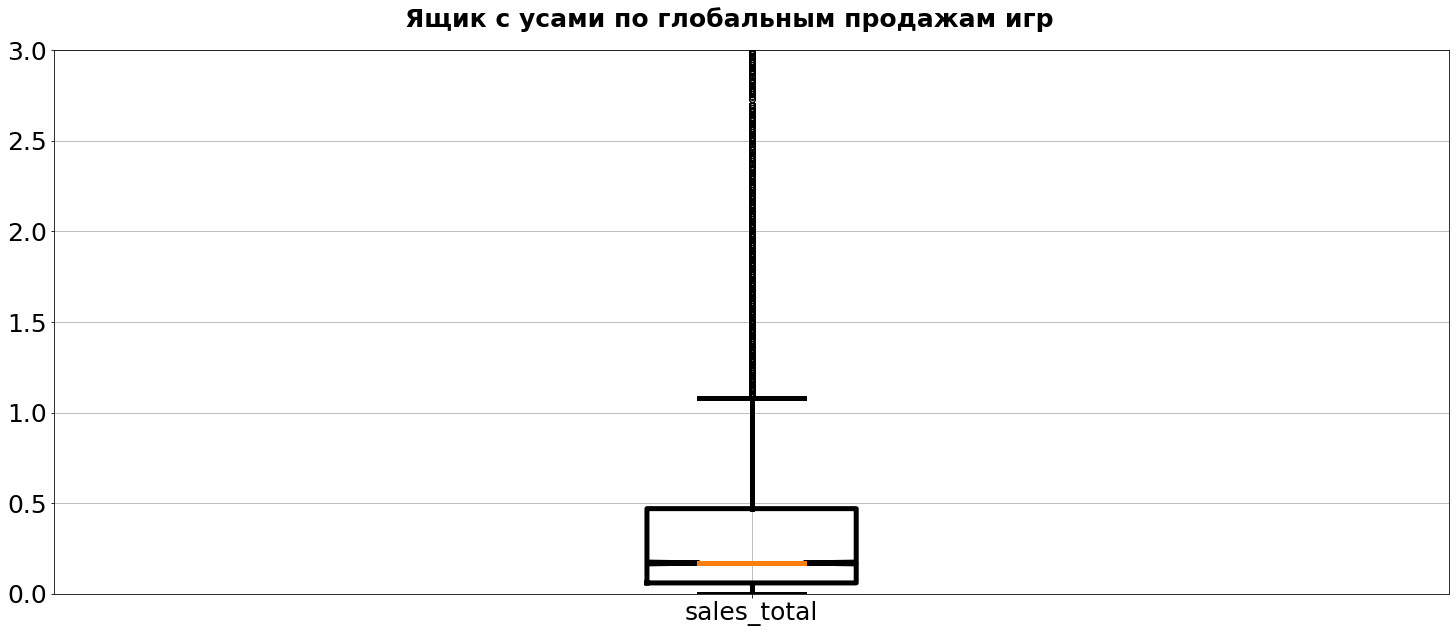

In [ ]:
create_any_sales_boxplot('Ящик с усами по глобальным продажам игр', ylims=[0,3])

Медиана по топовым платформам варьируется от 0,2 до 0,25 млн долларов прибыли за игру.
Верхняя граница предела, за которыми уже определяются аномалии, у двух платформ - PS3 и X360 - на уровне 1,7 млн долларов.
У остальных - от 1 до 1,5 миллионов долларов.
Среди всех выделяется Nintendo DS - у него эти показатели сильное ниже. Медиана < 0,1 миллиона долларов, верхняя граница - 0,6 млн.

#### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сделаем выводы:

In [ ]:
ps4 = data.query("platform == 'PS4'")
xone = data.query("platform == 'XOne'")
ps4_f = ps4.query(f"{critic_score_mark and user_score_mark}")
features = ['user_score', 'critic_score', 'sales_total']

cmap=sns.diverging_palette(240, 10, as_cmap=True)
ps4_f[features].corr().style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '100px', 'font-size': '12pt'})\
    .set_precision(2)

,user_score,critic_score,sales_total
user_score,1.00,0.39,-0.03
critic_score,0.39,1.00,0.35
sales_total,-0.03,0.35,1.00


In [ ]:
xone_f = xone.query(f"{critic_score_mark and user_score_mark}")
xone_f[features].corr().style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '100px', 'font-size': '12pt'})\
    .set_precision(2)

,user_score,critic_score,sales_total
user_score,1.00,0.25,-0.07
critic_score,0.25,1.00,0.33
sales_total,-0.07,0.33,1.00


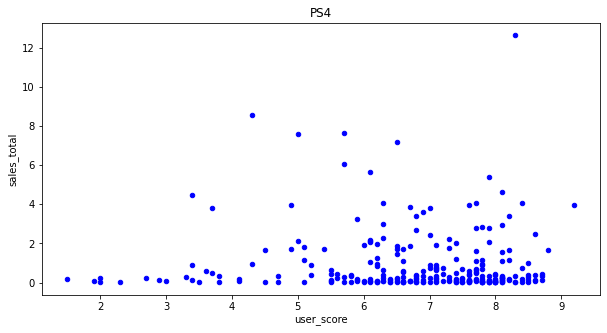

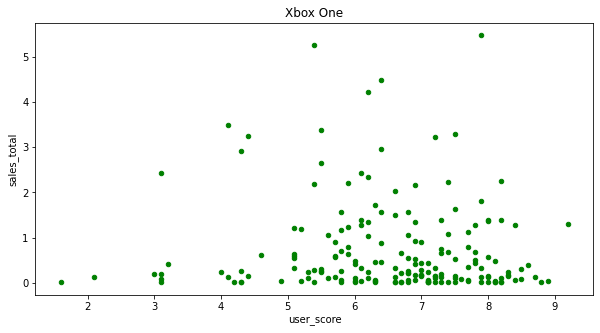

In [ ]:
ps4_f.plot(x='user_score', y='sales_total', kind='scatter', title='PS4',figsize=(10, 5), color='blue')
xone_f.plot(x='user_score', y='sales_total', kind='scatter', title='Xbox One',figsize=(10, 5), color='green')
plt.show()

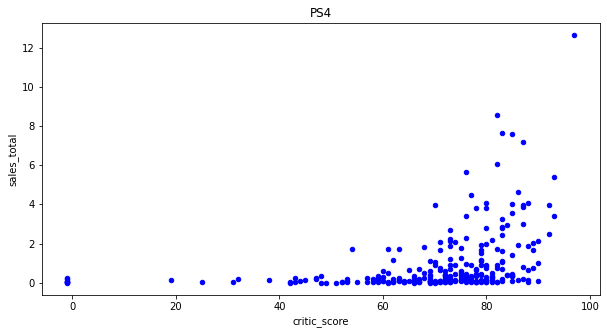

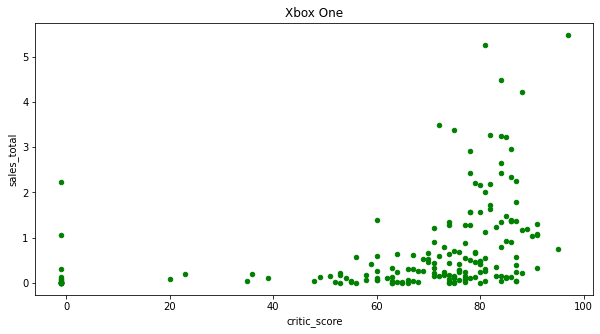

In [ ]:
ps4_f.plot(x='critic_score', y='sales_total', kind='scatter', title='PS4',figsize=(10, 5), color='blue')
xone_f.plot(x='critic_score', y='sales_total', kind='scatter', title='Xbox One',figsize=(10, 5), color='green')
plt.show()

Построим матрицу корреляции:

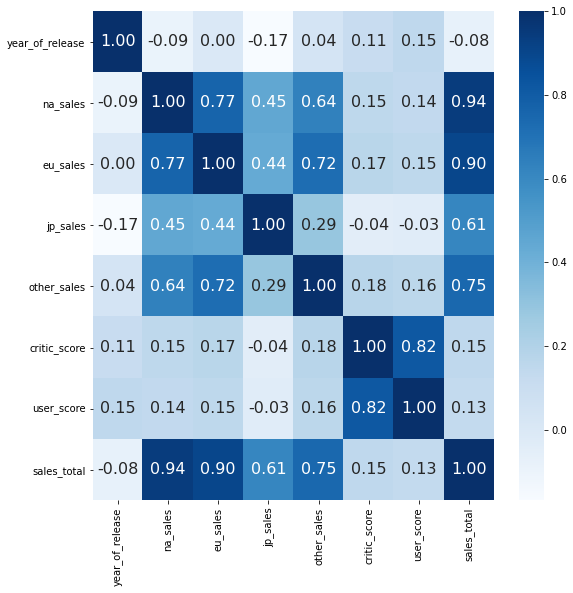

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(data.corr(), annot=True, cmap="Blues", fmt='.2f', annot_kws={'size':16});

Выделим нужные нам данные:

In [ ]:
games_ps3 = data[(data['platform'] == 'PS3') & (data['user_score'] > 0)].copy()

In [ ]:
data_ps3_filtered = games_ps3[['sales_total' ,'critic_score', 'user_score']]

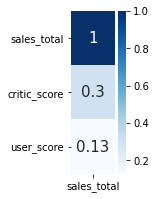

In [ ]:
plt.figure(figsize=(1,3))
sns.heatmap(data_ps3_filtered.corr()[['sales_total']].sort_values(by='sales_total', ascending=False), cmap="Blues", 
            annot=True, annot_kws={'size':15});

Согласно корреляции сильнее всего на продажи влияет оценка критиков, оценка же пользователей почти не влияет

Взаимосвязи между отзывами пользователей и продажами нет.  
Взаимосвязь между отзывами критиков и продажами существует, но не слишком большая.
Корреляция не говорит о причинно-следственной связи. И по диаграммам рассеяния видно, что чем выше оценки критиков, тем выше продажи игр на обоих платформах.

Построим корреляцию для других топовых платформ:

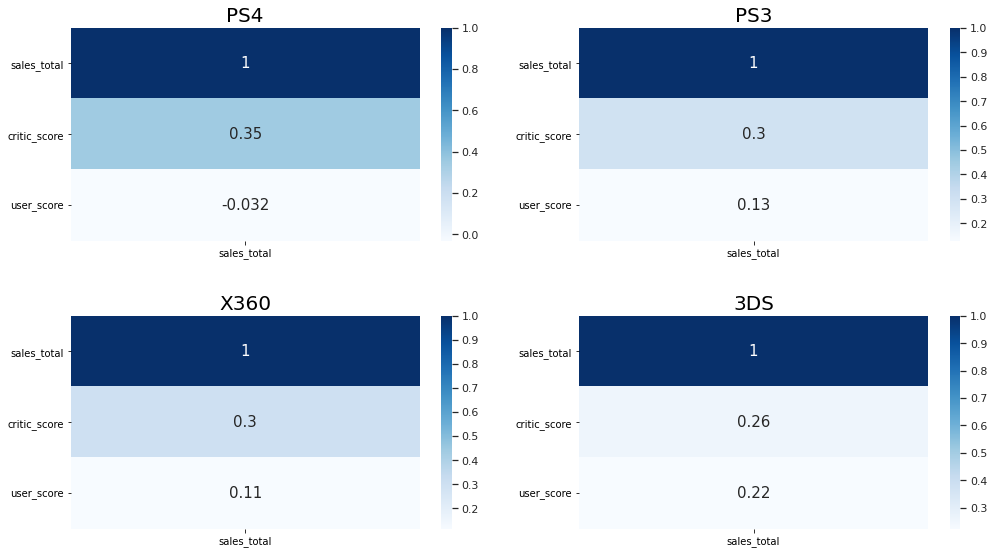

In [ ]:
top_platforms = ['PS4', 'PS3', 'X360', '3DS', 'XOne']

rows = len(top_platforms) // 2
cols = 2
fig, axes = plt.subplots(rows, cols, figsize=(15,8.5))
count = 0
for r in range(rows):
    for c in range(cols):
        curr_platform = top_platforms[count]
        df_prep = data[(data['platform'] == curr_platform) & (data['user_score'] > 0)].copy()
        
        df_filtered = df_prep[['sales_total' ,'critic_score', 'user_score']]
        sns.set(font_scale=1.0)
        ax = sns.heatmap(df_filtered.corr()[['sales_total']].sort_values(by='sales_total', ascending=False), 
                         cmap="Blues", annot=True, annot_kws={'size':15}, ax=axes[r,c])
        ax.set_title(curr_platform, fontsize=20)
        ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
        plt.tight_layout(pad=3)
        count += 1

Общий вывод:
Провела корректировку своего анализа и получила такие выводы.
    
- Данные по корреляции между выручкой и оценкой по платформам PS2, X360, PS3, PS и XOne более или менее совпадает с общими данными по датафрейму.
- Выделяются Wii и DS, по которым зависимость не такая большая.
- Есть так же платформы, где оценка критиков, согласно данных, сильнее "определяет" конечную выручку продукта, чем оценка пользователей. Это платформы DS, PS4 и Xone. В случае с DS полагаю, что дело в том, что приставка азиатская, большую популярность она имеет в Азии и соответственно, далеко не большая часть игроков принимает участие в оценке игр на эту платформу. 
- Про PS4 и Xone - платформы довольно новые, вполне вероятно, что пользователи пока не "освоились", поэтому большого количества отзывов, особенно качественных от них нет.

In [ ]:
actual_platforms.query('critic_score > 90')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
149,The Last of Us,PS3,2013,Action,2.41,2.18,0.28,0.99,95.0,9.1,M,5.86
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
171,Uncharted 4: A Thief's End,PS4,2016,Shooter,1.85,2.50,0.19,0.85,93.0,7.9,T,5.39
260,Super Mario 3D World,WiiU,2013,Platform,2.11,1.16,0.73,0.32,93.0,9.0,E,4.32
303,The Witcher 3: Wild Hunt,PS4,2015,Role-Playing,1.02,2.13,0.23,0.59,92.0,9.2,M,3.97
390,Metal Gear Solid V: The Phantom Pain,PS4,2015,Action,1.09,1.36,0.49,0.48,93.0,8.2,M,3.42
448,The Legend of Zelda: A Link Between Worlds,3DS,2013,Action,1.40,1.01,0.46,0.23,91.0,8.9,E,3.10


In [ ]:
a1 = (ps4[['name','platform','sales_total']].sort_values(by ='sales_total',ascending = False)
                                            .rename(columns={'sales_total':'ps4_total_sales'}).head(10)
     )
a2 =(xone[['name','platform','sales_total']].sort_values(by ='sales_total',ascending = False)
                                            .rename(columns={'sales_total':'xone_total_sales'}).head(10).head(10)
    )
aj = a1.merge(a2, on='name', how='outer')
aj

,name,platform_x,ps4_total_sales,platform_y,xone_total_sales
0,Call of Duty: Black Ops 3,PS4,14.63,XOne,7.39
1,Grand Theft Auto V,PS4,12.62,XOne,5.47
2,FIFA 16,PS4,8.58,XOne,3.25
3,Star Wars Battlefront (2015),PS4,7.98,XOne,3.66
4,Call of Duty: Advanced Warfare,PS4,7.66,XOne,5.26
5,FIFA 17,PS4,7.60,NaN,NaN
6,Fallout 4,PS4,7.17,XOne,4.22
7,FIFA 15,PS4,6.08,NaN,NaN
8,Destiny,PS4,5.64,XOne,3.37
9,Uncharted 4: A Thief's End,PS4,5.39,NaN,NaN


In [ ]:
data.query('name == "Grand Theft Auto V"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
1730,Grand Theft Auto V,PC,2015,Action,0.39,0.69,0.00,0.09,96.0,7.9,M,1.17


Обратим внимание, что хиты вроде GTA5 находятся в топе по продажам на обеих платформах и суммарная прибыль приближается к 100 млн долларов.

#### Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

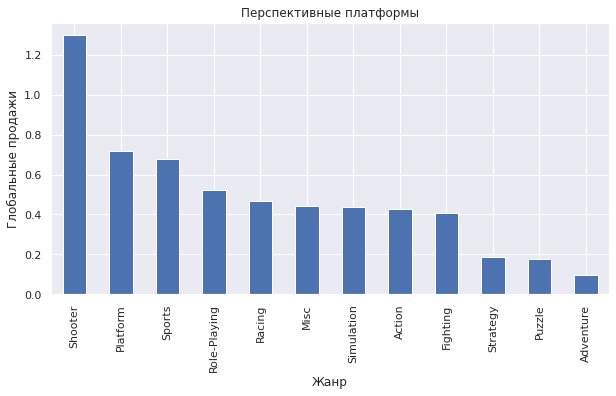

In [ ]:
(actual_platforms
    .pivot_table(index='genre', values='sales_total')
    .sort_values('sales_total', ascending=False)
    .plot(kind='bar', y='sales_total', figsize=(10, 5), legend=False,title = 'Перспективные платформы')
    .set(xlabel='Жанр', ylabel='Глобальные продажи'))

plt.show()

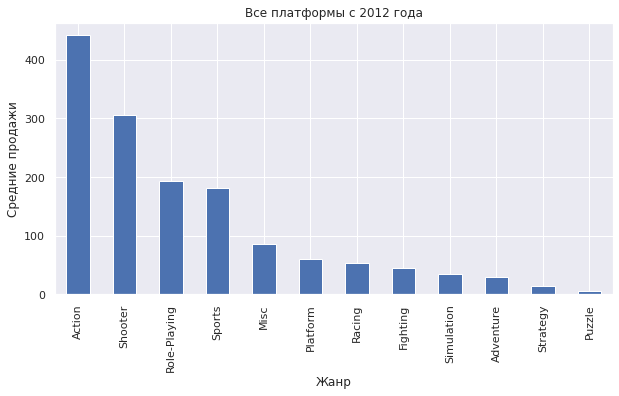

In [ ]:
(actual_platforms
    .pivot_table(index='genre', values='sales_total', aggfunc='sum')
    .sort_values('sales_total', ascending=False)
    .plot(kind='bar', y='sales_total', figsize=(10, 5), legend=False,title = 'Все платформы с 2012 года')
    .set(xlabel='Жанр', ylabel='Средние продажи'))

plt.show()

Вывод: При рассмотрении суммарных продаж лидерами были выявлены такие жанры как Action, Sports, Shooter, Role-Playing, Platform и Misc.
Больше всего игр жанра Action. За ними идут игры спортивного жанра. Причем даже учитывая то, что игр жанра "Спорт" заметно меньше на рынке (на треть от Action), выручка от продаж у них практически одинаковая. Это значит, что спортивные игры, в среднем, стоят дороже, чем шутеры. Ну и это ожидаемо, шутеры выходят преимущественно на PC, тогда как спортивные игры - на консолях.

Далее рассмотрим более подробно в разрезе регионов.

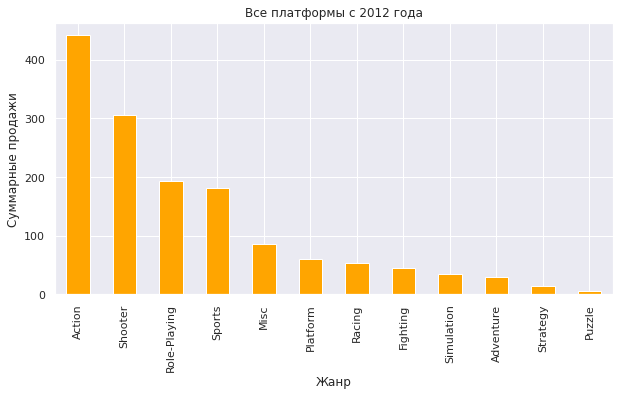

In [ ]:
# Пример к комментарию ревьюера
(actual_platforms
    .pivot_table(index='genre', values='sales_total', aggfunc='sum')
    .sort_values('sales_total', ascending=False)
    .plot(kind='bar', y='sales_total', figsize=(10, 5), legend=False,title = 'Все платформы с 2012 года', color='orange')
    .set(xlabel='Жанр', ylabel='Суммарные продажи'))

plt.show()

### Шаг 4. Составим портрет пользователя каждого региона:

#### Определим для пользователя каждого региона (NA, EU, JP):

In [ ]:
regions = ['na_sales','eu_sales','jp_sales']
print(actual_platforms[regions].sum())

na_sales    590.97
eu_sales    506.82
jp_sales    192.58
dtype: float64


Суммарный объём продаж в Японии более чем в 2.5 раза меньше Европы и Америки.

#### Топ 5 платформ:

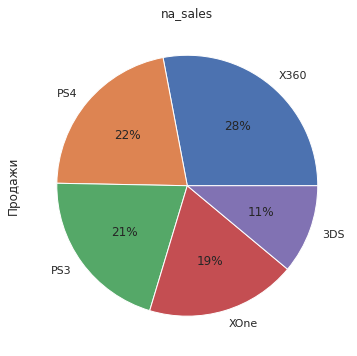

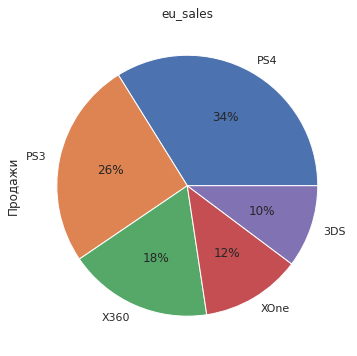

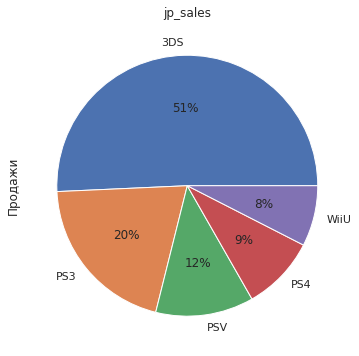

In [ ]:
for region in regions:
    (actual_platforms.pivot_table(index='platform', values=region, aggfunc='sum')
                .sort_values(region, ascending=False).head(5)
                .plot(kind='pie', y=region, autopct='%1.0f%%', figsize=(6, 6), legend=False, title = region)
                .set(ylabel='Продажи')
    )
    plt.show()

В Европе и Америке лидируют PS и Xbox.
В Японии с 50% рынка занимает их портативная консоль 3DS.

#### Топ 5 жанров:

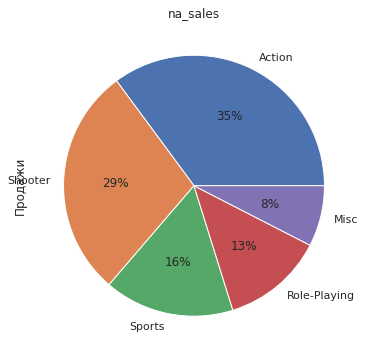

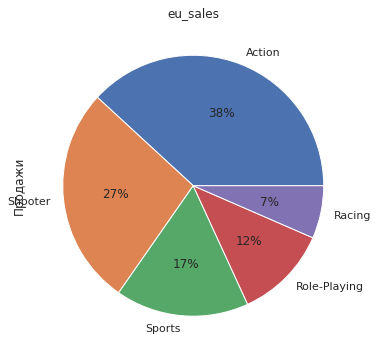

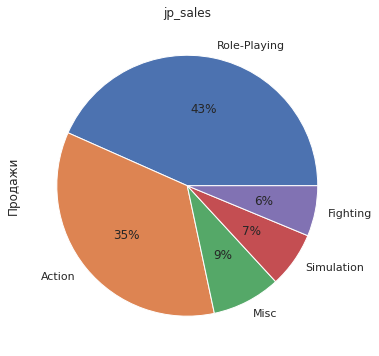

In [ ]:
for region in regions:
    (actual_platforms.pivot_table(index='genre', values=region, aggfunc='sum')
                .sort_values(region, ascending=False).head(5)
                .plot(kind='pie', y=region, autopct='%1.0f%%', figsize=(6, 6), legend=False, title = region)
                .set(ylabel='Продажи')
    )
    plt.show()

В Европе и Америке популярны жанры Action,Shooter и Sports.
Япония любит РПГ и Action.

#### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

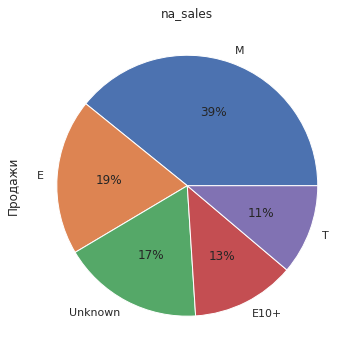

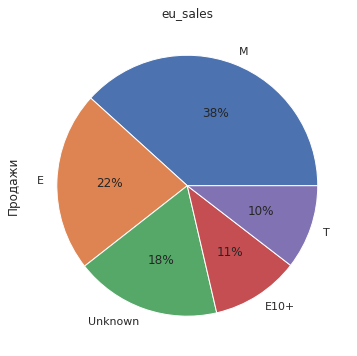

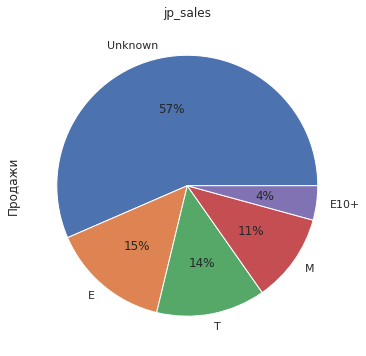

In [ ]:
for region in regions:
    (actual_platforms.pivot_table(index='rating', values=region, aggfunc='sum')
                .sort_values(region, ascending=False).head(5)
                .plot(kind='pie', y=region, autopct='%1.0f%%', figsize=(6, 6), legend=False, title = region)
                .set(ylabel='Продажи')
    )
    plt.show()

Снова похожая ситуация для Европы и Америки - хорошо продаются игры с рейтингом для взрослых и для всех.
В Японии много продаж по играм с неизвестным рейтингом и рейтингом для всех, думаю это связано с тем что в Японии среди пользователей другие игровые предпочтения, такие как ролевые игры и тд, а так как эти игры могут быть популярны на Азиатском рынке и иметь рейтинги внутреннего рынка, и не иметь мировой оценки.

#### Вывод:
Портреты пользователей из Европы и Америки схожи.
Лидируют платформы PS и Xbox, жанры Action,Shooter и Sports, игры с рейтингом для взрослых и для всех.

У пользователей из Японии свои предпочтения.
Лидирует консоль 3DS, жанры РПГ и Action, игры с неизвестным рейтингом и рейтингом для всех.

### Шаг 5. Проверим гипотезы:

 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;   
 - Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные.

#### Гипотеза 1.

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые:
    
 - H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
 - H1: Средние пользовательские рейтинги платформ Xbox One и PC различаются.

In [ ]:
xone = actual_platforms.query("platform == 'XOne' and user_score != -1")
pc = actual_platforms.query("platform == 'PC' and user_score != -1")

print("Дисперсия выборки Xbox One",np.var(xone['user_score']))
print("Дисперсия выборки PC",np.var(pc['user_score']))

Дисперсия выборки Xbox One 1.8965188383045526
Дисперсия выборки PC 2.7569952398906588


In [ ]:
alpha = .05

results = st.ttest_ind(
    actual_platforms.query('platform == "XOne"')['user_score'], 
    actual_platforms.query('platform == "PC"')['user_score'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.05605440473353122
Не получилось отвергнуть нулевую гипотезу


#### Вывод: 
Cредние пользовательские рейтинги платформ Xbox One и PC не отличаются между собой.

#### Гипотеза 2.

Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные:
    
- H0: Средние пользовательские рейтинги жанров Action и Sports различаются.
- H1: Средние пользовательские рейтинги жанров Action и Sports одинаковые.

In [ ]:
action = actual_platforms.query("genre == 'Action' and user_score != -1")
sport = actual_platforms.query("genre == 'Sports' and user_score != -1")

print("Дисперсия выборки action",np.var(action['user_score']))
print("Дисперсия выборки sport",np.var(sport['user_score']))

Дисперсия выборки action 1.8854720340439224
Дисперсия выборки sport 3.0073882971729127


In [ ]:
alpha = .05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    actual_platforms.query('genre == "Action"')['user_score'], 
    actual_platforms.query('genre == "Sports"')['user_score'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.0063523084836141505
Отвергаем нулевую гипотезу


In [ ]:
action['user_score'].mean()

6.825047801147227

In [ ]:
sport['user_score'].mean()

5.455897435897437

Средние пользовательские рейтинги жанров Action и Sports одинаковые. Наша гипотеза не подтвердилась.

### Шаг 6. Общий вывод


    
 - По проведенному анализу: самое сильное влияние на итоговую выручку оказывают, в большинстве случаев, оценки критиков. Оценки пользователей такое влияние не оказывают.
 - С 2010 года наблюдается спад продаж в игровой индустрии.
 - Платформы появляются и умирают в течение 10 лет.
 - Наиболее популярные и перспективные на данный момент платформы – это PS4, PS3, X360, 3DS, XOne.
 - В среднем одна игра выпущенная на платформе приносит прибыль около 300 тысяч долларов, но есть хиты как ГТА5 которые находятся в топе продаж на всех представленных платформах и суммарная прибыль приближается к 100 млн. долларов
 - В США и Европе лучше всего продаются экшены и шутеры.
 - Больше всего продаж приходится на игры с рейтингом для взрослых и для всех.
 - Япония – отдельный рынок с уклоном в портативные консоли и ролевые игры. Объём продаж в этой стране в 2.5 раза меньше показаталей Европы и Америки.
 - Потенциально выгодно разработать игру для рынка Европы и Америки на перспективных платформах Sony PlayStation 4 и Xbox One в жанре Shooter/Action. Японский рынок имеет свою специфику по платформам и жанрам, кроме того не слишком обширен.
 - Дополнительно стоит ещё раз отметить, что у нас отсутствуют данные по самому популярному сейчас сегменту игр - это MMORPG,MMOBA, Survival а также нет данных по играм на мобильниках. Оффлайн игры уходят в прошлое.
Онлайн игры распространяются по модели ФТП, либо месячной подписки и обычно имеют "донат", который приносит прибыль. Весьма вероятно по этой причине платформа PC не попадает в разряд перспективных, также может влиять фактор "пиратства".
    Основные платформы PS4, PS3, X360, 3DS, XOne.